### PS

### Load libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Classes

In [2]:
class_names = {
    0: '20_speed',
    1: '30_speed',
    2: '50_speed',
    3: '60_speed',
    4: '70_speed',
    5: '80_speed',
    6: '80_lifted',
    7: '100_speed',
    8: '120_speed',
    9: 'no_overtaking_general',
    10: 'no_overtaking_trucks',
    11: 'right_of_way_crossing',
    12: 'right_of_way_general',
    13: 'give_way',
    14: 'stop',
    15: 'no_way_general',
    16: 'no_way_trucks',
    17: 'no_way_one_way',
    18: 'attention_general',
    19: 'attention_left_turn',
    20: 'attention_right_turn',
    21: 'attention_curvy',
    22: 'attention_bumpers',
    23: 'attention_slippery',
    24: 'attention_bottleneck',
    25: 'attention_construction',
    26: 'attention_traffic_light',
    27: 'attention_pedestrian',
    28: 'attention_children',
    29: 'attention_bikes',
    30: 'attention_snowflake',
    31: 'attention_deer',
    32: 'lifted_general',
    33: 'turn_right',
    34: 'turn_left',
    35: 'turn_straight',
    36: 'turn_straight_right',
    37: 'turn_straight_left',
    38: 'turn_right_down',
    39: 'turn_left_down',
    40: 'turn_circle',
    41: 'lifted_no_overtaking_general',
    42: 'lifted_no_overtaking_trucks'
}

Mapping the traffic signs names to a 'classes' array (ordered)

In [3]:
classes = []
for key in sorted(class_names.keys()):
    classes.append(class_names[key])

classes

['20_speed',
 '30_speed',
 '50_speed',
 '60_speed',
 '70_speed',
 '80_speed',
 '80_lifted',
 '100_speed',
 '120_speed',
 'no_overtaking_general',
 'no_overtaking_trucks',
 'right_of_way_crossing',
 'right_of_way_general',
 'give_way',
 'stop',
 'no_way_general',
 'no_way_trucks',
 'no_way_one_way',
 'attention_general',
 'attention_left_turn',
 'attention_right_turn',
 'attention_curvy',
 'attention_bumpers',
 'attention_slippery',
 'attention_bottleneck',
 'attention_construction',
 'attention_traffic_light',
 'attention_pedestrian',
 'attention_children',
 'attention_bikes',
 'attention_snowflake',
 'attention_deer',
 'lifted_general',
 'turn_right',
 'turn_left',
 'turn_straight',
 'turn_straight_right',
 'turn_straight_left',
 'turn_right_down',
 'turn_left_down',
 'turn_circle',
 'lifted_no_overtaking_general',
 'lifted_no_overtaking_trucks']

Display an image from each class.

See clothing_classifications for more.

In [4]:
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])

### Data generation and image augmentation

Image augmentation

In [5]:
import keras
from keras.preprocessing.image import ImageDataGenerator

# MobileNet doesn't like rescale=1./255 because it slept with his wife 
train_datagen = ImageDataGenerator(rotation_range=20,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.01,
                                  zoom_range=[0.9, 1.25],
                                  brightness_range=[0.5, 1.5],
                                  preprocessing_function = keras.applications.mobilenet.preprocess_input)

# Note that the validation data should not be augmented!
# val_datagen = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input)

Using TensorFlow backend.


Load the dataset

In [6]:
BATCH_SIZE = 30
IMG_ROWS = 224
IMG_COLS = 224
NUM_CLASSES = 43
EPOCHS = 10

In [7]:
train_path = r"../GTSRB/Training"
test_path = r"../GTSRB/Testing_FFD"

# train_dir, val_dir = keras.utils.train_valid_split(train_path, 0.2)
# # all data in train_dir which are alias to original_data.
# # and train_dir is a temporary directory.

train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(IMG_ROWS, IMG_COLS),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

# valid_generator = val_datagen.flow_from_directory(
#     directory=val_dir,
#     target_size=(IMG_ROWS, IMG_COLS),
#     color_mode="rgb",
#     batch_size=BATCH_SIZE,
#     class_mode="categorical",
#     shuffle=True,
#     seed=42
# )

test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(IMG_ROWS, IMG_COLS),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 43 classes.


In [8]:
# train_generator.class_indices

In [9]:
# valid_generator.class_indices

In [10]:
# test_generator.class_indices

### MobileNet model

In [11]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense

Import MobileNet

In [12]:
mobilenet_model = keras.applications.mobilenet.MobileNet()

Plot MobileNet model

In [13]:
mobilenet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [14]:
from keras.models import Model

# vid= -6
outputs = mobilenet_model.layers[-6].output 
predictions = Dense(43, activation='softmax')(outputs)    # softmax, sigmoid
model = Model(inputs=mobilenet_model.inputs, outputs=predictions)

Setting the layers to be non-trainable; we don't want to override the initial training

In [15]:
# vid = 23
# 23.. 25.. 30 (try lower everytime)
# 40 e=10 SGD => tr=99% ts=3.5% (rescale is bad)
# 10 e=3 SGD => tr=66% ts=3.5% (rescale is very bad)
# 23 e=3 NAdam => tr=98% ts=92%
# 23 e=10 NAdam => tr=99.2% ts=94.6%
# 23 e=10 SGD => tr=[]% ts=94.6%

for layer in model.layers[:-23]:
    layer.trainable = False

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

### Compile model

In [17]:
# from keras.optimizers import SGD
from keras.optimizers import Nadam

# my_sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(
    optimizer=Nadam(lr=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Training

In [18]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

train_generator.reset()
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=EPOCHS,
                    verbose=1,
                    workers=6 # play around with it
)

Epoch 1/10
1306/1306 [==============================] - 749s 574ms/step - loss: 0.2631 - acc: 0.9210
Epoch 2/10
1306/1306 [==============================] - 773s 592ms/step - loss: 0.0827 - acc: 0.9728
Epoch 3/10
1306/1306 [==============================] - 835s 639ms/step - loss: 0.0573 - acc: 0.9815
Epoch 4/10
1306/1306 [==============================] - 701s 537ms/step - loss: 0.0481 - acc: 0.9845
Epoch 5/10
1306/1306 [==============================] - 633s 485ms/step - loss: 0.0429 - acc: 0.9863
Epoch 6/10
1306/1306 [==============================] - 667s 511ms/step - loss: 0.0355 - acc: 0.9891
Epoch 7/10
1306/1306 [==============================] - 672s 514ms/step - loss: 0.0329 - acc: 0.9900
Epoch 8/10
1306/1306 [==============================] - 643s 492ms/step - loss: 0.0294 - acc: 0.9908
Epoch 9/10
1306/1306 [==============================] - 635s 486ms/step - loss: 0.0246 - acc: 0.9920
Epoch 10/10
1306/1306 [==============================] - 628s 481ms/step - loss: 0.0229 - a

### Predictions

In [19]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()

predictions = model.predict_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)

421/421 [==============================] - 209s 496ms/step


### Evaluations

See model.evaluate_generator doc

In [20]:
loss, acc = model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)

421/421 [==============================] - 66s 156ms/step


In [25]:
print("Loss = {:0.3f} \nAccuracy = {:0.3f}%".format(loss, acc*100))

Loss = 0.209 
Accuracy = 94.956%


### Confusion matrix

In [26]:
test_labels = test_generator.classes

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [28]:
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    """
    FONT_SIZE = 8

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8*2, 6*2))    # 8, 6
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90, fontsize=FONT_SIZE)
        plt.yticks(tick_marks, target_names, fontsize=FONT_SIZE)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     fontsize=FONT_SIZE,
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     fontsize=FONT_SIZE,
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

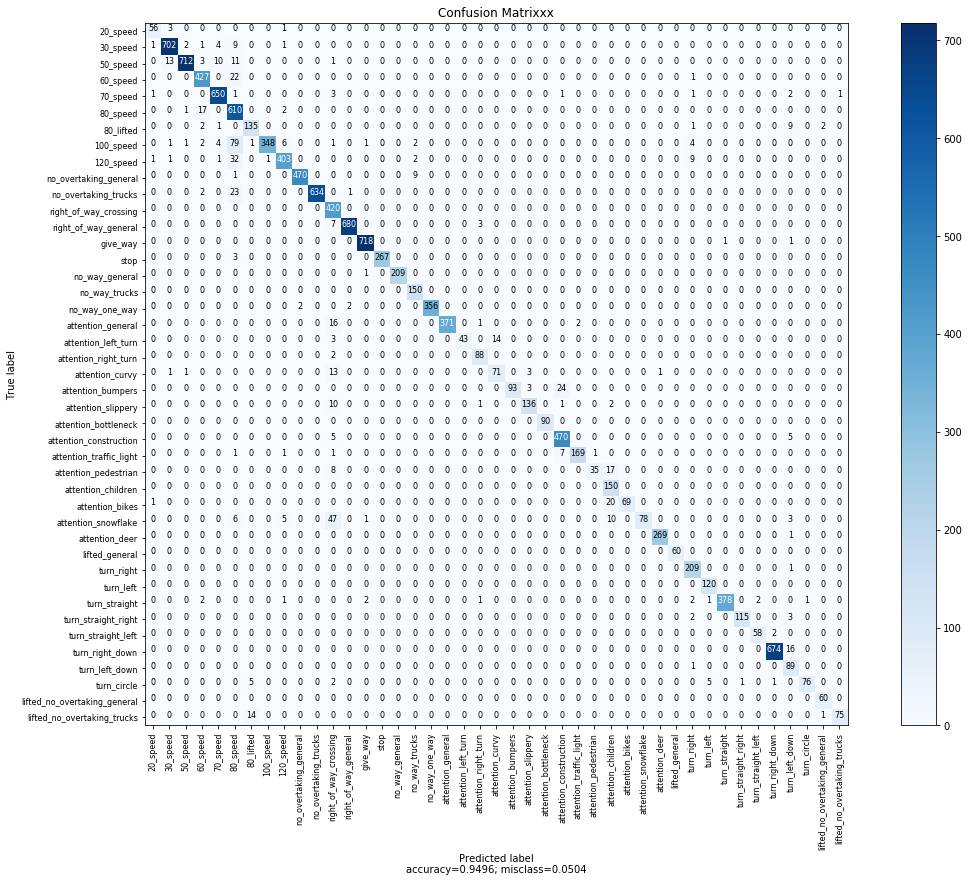

In [29]:
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrixxx')

### Plot the test images
From the basic_classifications Notebook

Plot the image and the predicted label under it

    If the image is correctly predicted, output the label in green
    
    If the image is incorrectly predicte, output the label in red
    
Also, look at basic-text-classification for plotting train_loss vs val_loss and train_acc vs val_acc 

In [30]:
#Code

## Save the model

In [31]:
# Save the weights
model.save_weights('MobileNet_model_weights.h5')

# Save the model architecture
with open('MobileNet_model_architecture.json', 'w') as f:
    f.write(model.to_json())

### Load the model

In [32]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('MobileNet_model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('MobileNet_model_weights.h5')